In [1]:
import pandas as pd 
import numpy as np 
from pandas.testing import assert_frame_equal
from pandas_datareader import data as web

import warnings
warnings.filterwarnings('ignore')

# Import the plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
#import hist. btc data since 

btc = web.DataReader('BTC-USD', data_source = 'yahoo', start='2014-01-01')
btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-02-23,54204.929688,45290.589844,54204.929688,48824.425781,1.061025e+11,48824.425781
2021-02-24,51290.136719,47213.500000,48835.085938,49705.332031,6.369552e+10,49705.332031
2021-02-25,51948.968750,47093.851562,49709.082031,47093.851562,5.450657e+10,47093.851562


In [4]:
btc = btc[['Close', 'Volume']]

In [7]:
btc = btc.loc['2017-01-01':]

Text(0.5, 1.0, 'Bitcoin Volume Chart')

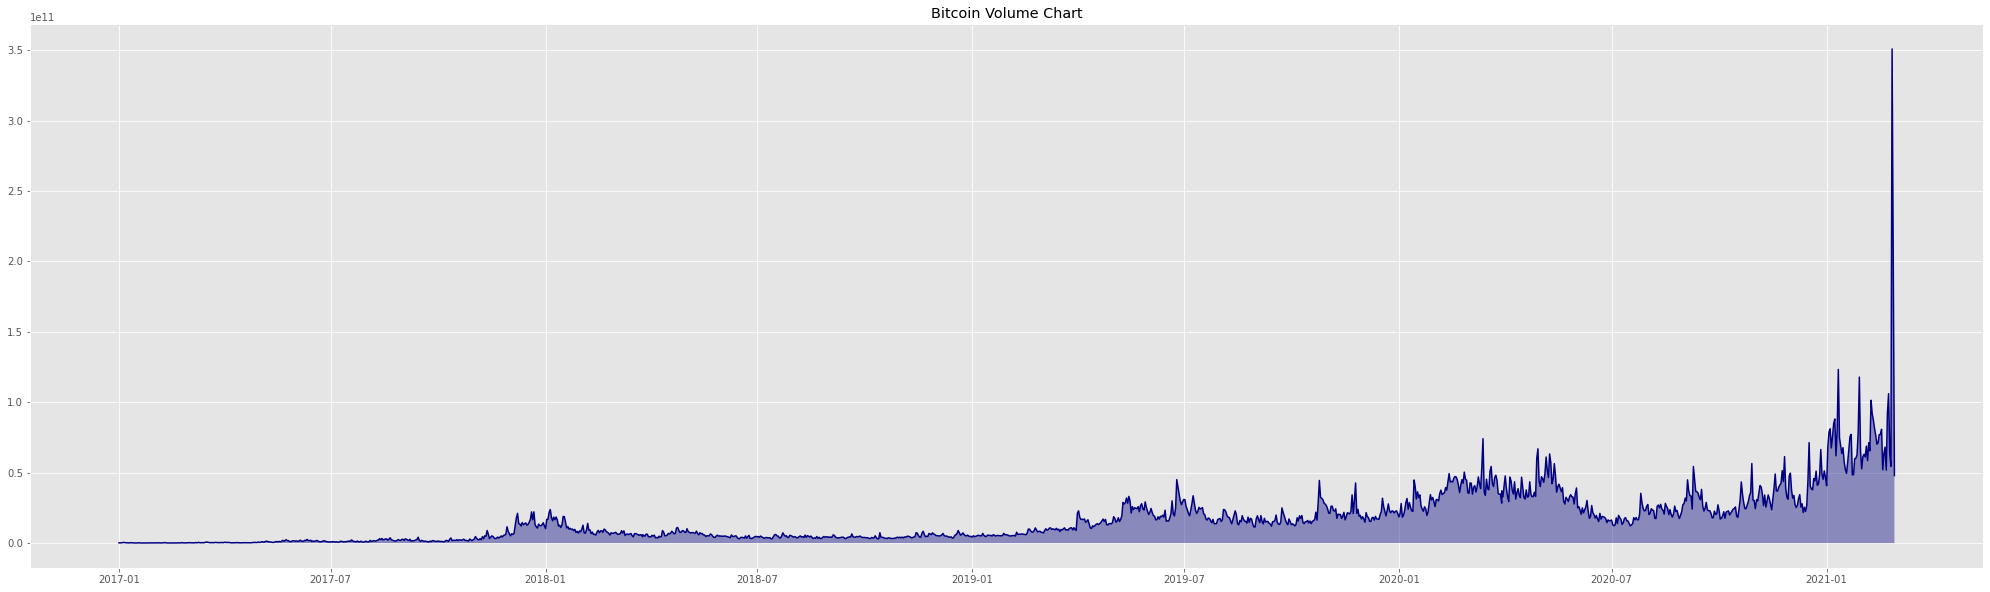

In [13]:
f, ax = plt.subplots(figsize=(35,10))

ax.plot(btc['Volume'], color = 'navy')
ax.fill_between(btc.index, btc['Volume'],  facecolor ='navy', alpha = 0.4) 
ax.set_title('Bitcoin Volume Chart')

In [14]:
btc[['Price_Pct_Change', 'Volume_Pct_Change']] = btc[['Close', 'Volume']].pct_change()

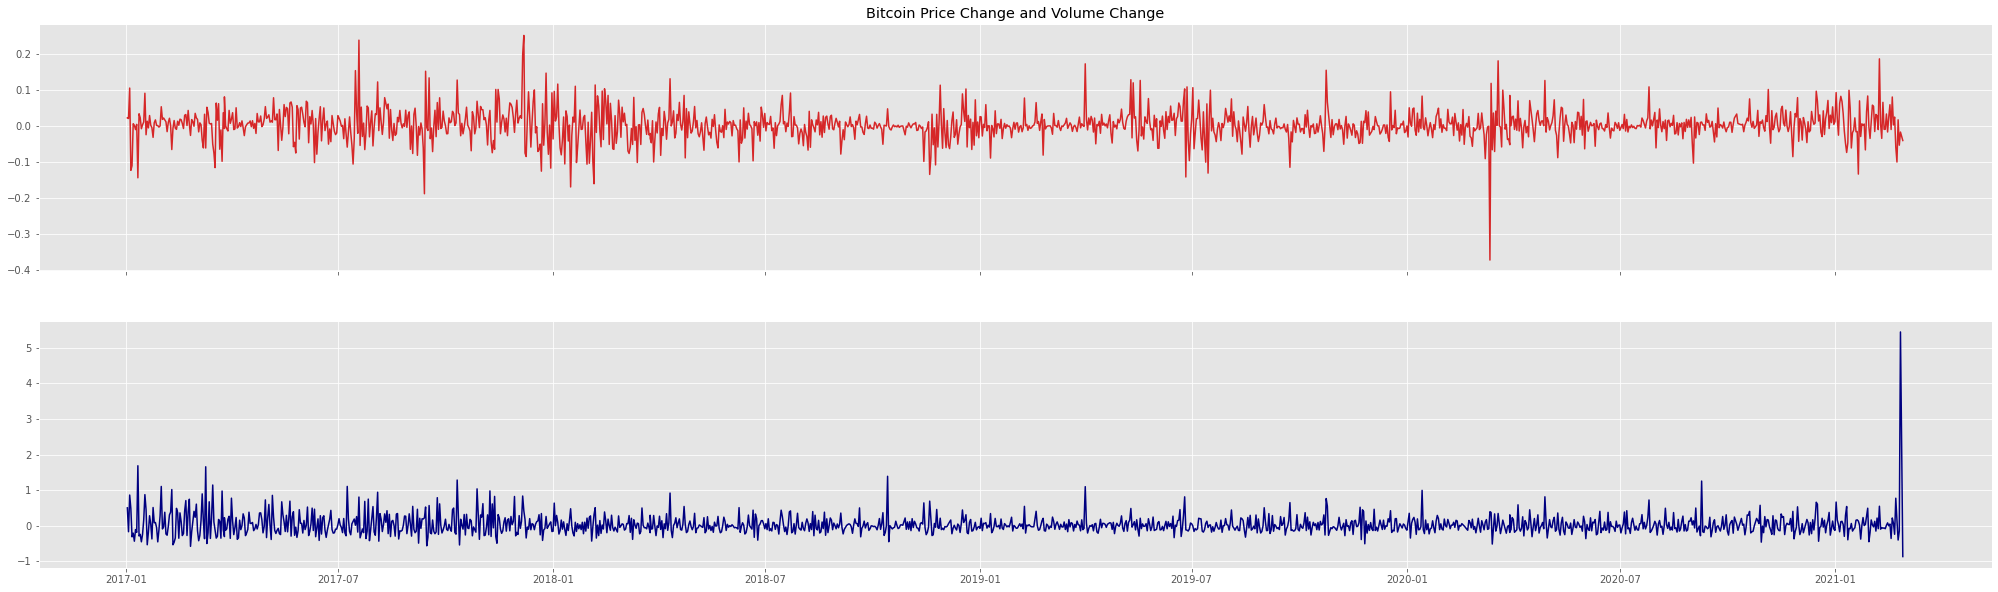

In [17]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex = True, figsize=(35,10))

ax1.set_title('Bitcoin Price Change and Volume Change')
ax1.plot(btc['Price_Pct_Change'], color = 'tab:red')

ax2.plot(btc['Volume_Pct_Change'], color = 'navy')

[Text(0, 0, '-5 Sigma'),
 Text(0, 0, '-4 Sigma'),
 Text(0, 0, '-3 Sigma'),
 Text(0, 0, '-2 Sigma'),
 Text(0, 0, '-1 Sigma'),
 Text(0, 0, '0'),
 Text(0, 0, '1 Sigma'),
 Text(0, 0, '2 Sigma'),
 Text(0, 0, '3 Sigma'),
 Text(0, 0, '4 Sigma'),
 Text(0, 0, '5 Sigma')]

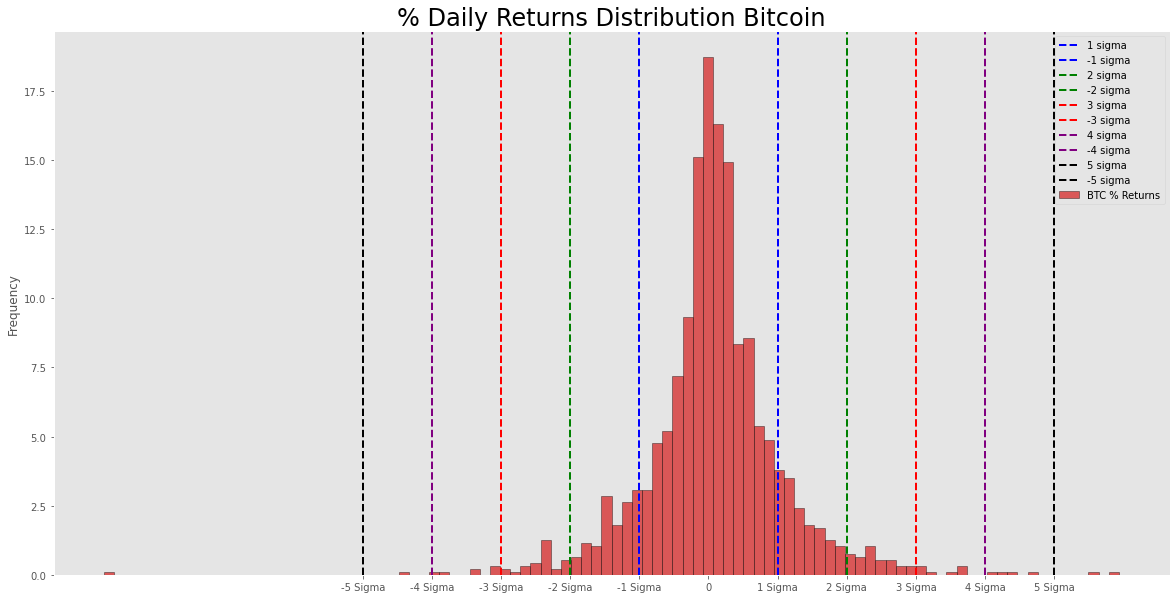

In [23]:
fig, ax = plt.subplots(figsize=(20,10))

ax.hist(
    btc['Price_Pct_Change'], 
    bins=100, 
    label='BTC % Returns', 
    color='tab:red', 
    alpha=.75,
    density=True,
    ec = 'black'
)

# Enable the legend
ax.legend()
ax.set_title("% Daily Returns Distribution Bitcoin", fontsize=24)
ax.set_xlabel("")
ax.set_ylabel("Frequency")
ax.set_xticks([])
ax.grid(False)
plt.axvline(x= btc['Price_Pct_Change'].std(), label = '1 sigma', linestyle='dashed', linewidth = 2, color = 'blue')
plt.axvline(x= - btc['Price_Pct_Change'].std(), label = '-1 sigma', linestyle='dashed', linewidth = 2, color = 'blue')
plt.axvline(x= 2 * btc['Price_Pct_Change'].std(), label = '2 sigma', linestyle='dashed', linewidth = 2, color = 'green')
plt.axvline(x= - 2 *btc['Price_Pct_Change'].std(), label = '-2 sigma', linestyle='dashed', linewidth = 2, color = 'green')
plt.axvline(x= 3 * btc['Price_Pct_Change'].std(), label = '3 sigma', linestyle='dashed', linewidth = 2, color = 'red')
plt.axvline(x= - 3 * btc['Price_Pct_Change'].std(), label = '-3 sigma', linestyle='dashed', linewidth = 2, color = 'red')
plt.axvline(x= 4 * btc['Price_Pct_Change'].std(), label = '4 sigma', linestyle='dashed', linewidth = 2, color = 'purple')
plt.axvline(x= - 4 *btc['Price_Pct_Change'].std(), label = '-4 sigma', linestyle='dashed', linewidth = 2, color = 'purple')
plt.axvline(x= 5 * btc['Price_Pct_Change'].std(), label = '5 sigma', linestyle='dashed', linewidth = 2, color = 'black')
plt.axvline(x= - 5 *btc['Price_Pct_Change'].std(), label = '-5 sigma', linestyle='dashed', linewidth = 2, color = 'black')
plt.legend()

x = ['-5 Sigma', '-4 Sigma', '-3 Sigma', '-2 Sigma', '-1 Sigma', '0', '1 Sigma', '2 Sigma', '3 Sigma', '4 Sigma', '5 Sigma']
l = [(- 5 *btc['Price_Pct_Change'].std()) , (- 4 *btc['Price_Pct_Change'].std()), (- 3 *btc['Price_Pct_Change'].std()), (- 2 *btc['Price_Pct_Change'].std()), (-1 *btc['Price_Pct_Change'].std()), 0,
     (1 * btc['Price_Pct_Change'].std()), (2 *btc['Price_Pct_Change'].std()), (3 * btc['Price_Pct_Change'].std()), (4 *btc['Price_Pct_Change'].std()), (5 *btc['Price_Pct_Change'].std())]

ax.set_xticks(l)
ax.set_xticklabels(x)

[Text(0, 0, '-5 Sigma'),
 Text(0, 0, '-4 Sigma'),
 Text(0, 0, '-3 Sigma'),
 Text(0, 0, '-2 Sigma'),
 Text(0, 0, '-1 Sigma'),
 Text(0, 0, '0'),
 Text(0, 0, '1 Sigma'),
 Text(0, 0, '2 Sigma'),
 Text(0, 0, '3 Sigma'),
 Text(0, 0, '4 Sigma'),
 Text(0, 0, '5 Sigma')]

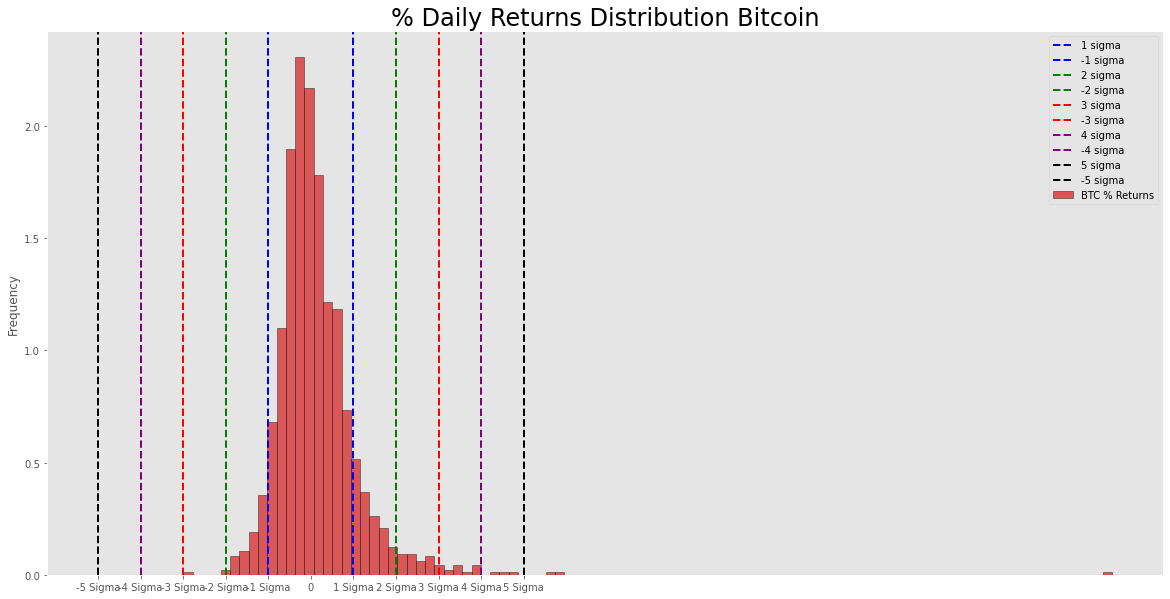

In [24]:
fig, ax = plt.subplots(figsize=(20,10))

ax.hist(
    btc['Volume_Pct_Change'], 
    bins=100, 
    label='BTC % Returns', 
    color='tab:red', 
    alpha=.75,
    density=True,
    ec = 'black'
)

# Enable the legend
ax.legend()
ax.set_title("% Daily Returns Distribution Bitcoin", fontsize=24)
ax.set_xlabel("")
ax.set_ylabel("Frequency")
ax.set_xticks([])
ax.grid(False)
plt.axvline(x= btc['Volume_Pct_Change'].std(), label = '1 sigma', linestyle='dashed', linewidth = 2, color = 'blue')
plt.axvline(x= - btc['Volume_Pct_Change'].std(), label = '-1 sigma', linestyle='dashed', linewidth = 2, color = 'blue')
plt.axvline(x= 2 * btc['Volume_Pct_Change'].std(), label = '2 sigma', linestyle='dashed', linewidth = 2, color = 'green')
plt.axvline(x= - 2 *btc['Volume_Pct_Change'].std(), label = '-2 sigma', linestyle='dashed', linewidth = 2, color = 'green')
plt.axvline(x= 3 * btc['Volume_Pct_Change'].std(), label = '3 sigma', linestyle='dashed', linewidth = 2, color = 'red')
plt.axvline(x= - 3 * btc['Volume_Pct_Change'].std(), label = '-3 sigma', linestyle='dashed', linewidth = 2, color = 'red')
plt.axvline(x= 4 * btc['Volume_Pct_Change'].std(), label = '4 sigma', linestyle='dashed', linewidth = 2, color = 'purple')
plt.axvline(x= - 4 *btc['Volume_Pct_Change'].std(), label = '-4 sigma', linestyle='dashed', linewidth = 2, color = 'purple')
plt.axvline(x= 5 * btc['Volume_Pct_Change'].std(), label = '5 sigma', linestyle='dashed', linewidth = 2, color = 'black')
plt.axvline(x= - 5 *btc['Volume_Pct_Change'].std(), label = '-5 sigma', linestyle='dashed', linewidth = 2, color = 'black')
plt.legend()

x = ['-5 Sigma', '-4 Sigma', '-3 Sigma', '-2 Sigma', '-1 Sigma', '0', '1 Sigma', '2 Sigma', '3 Sigma', '4 Sigma', '5 Sigma']
l = [(- 5 *btc['Volume_Pct_Change'].std()) , (- 4 *btc['Volume_Pct_Change'].std()), (- 3 *btc['Volume_Pct_Change'].std()), (- 2 *btc['Volume_Pct_Change'].std()), (-1 *btc['Volume_Pct_Change'].std()), 0,
     (1 * btc['Volume_Pct_Change'].std()), (2 *btc['Volume_Pct_Change'].std()), (3 * btc['Volume_Pct_Change'].std()), (4 *btc['Volume_Pct_Change'].std()), (5 *btc['Volume_Pct_Change'].std())]

ax.set_xticks(l)
ax.set_xticklabels(x)

In [25]:
btc[['Price_Pct_Change', 'Volume_Pct_Change']].corr()

,Price_Pct_Change,Volume_Pct_Change
Price_Pct_Change,1.000000,0.109607
Volume_Pct_Change,0.109607,1.000000


In [26]:
btc[['Close', 'Volume']].corr()

,Close,Volume
Close,1.000000,0.741594
Volume,0.741594,1.000000


Text(0.5, 1.0, 'Regression Plot BTC Close vs. Volume')

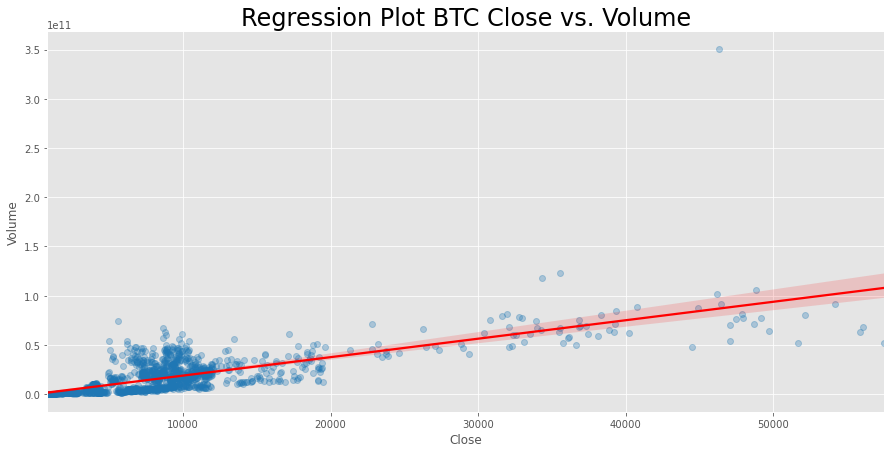

In [33]:
plt.figure(figsize=(15,7))
sns.regplot(x="Close",y="Volume",data=btc, color='tab:blue', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Regression Plot BTC Close vs. Volume', fontsize=24)

In [35]:
btc_log = btc.apply(np.log)

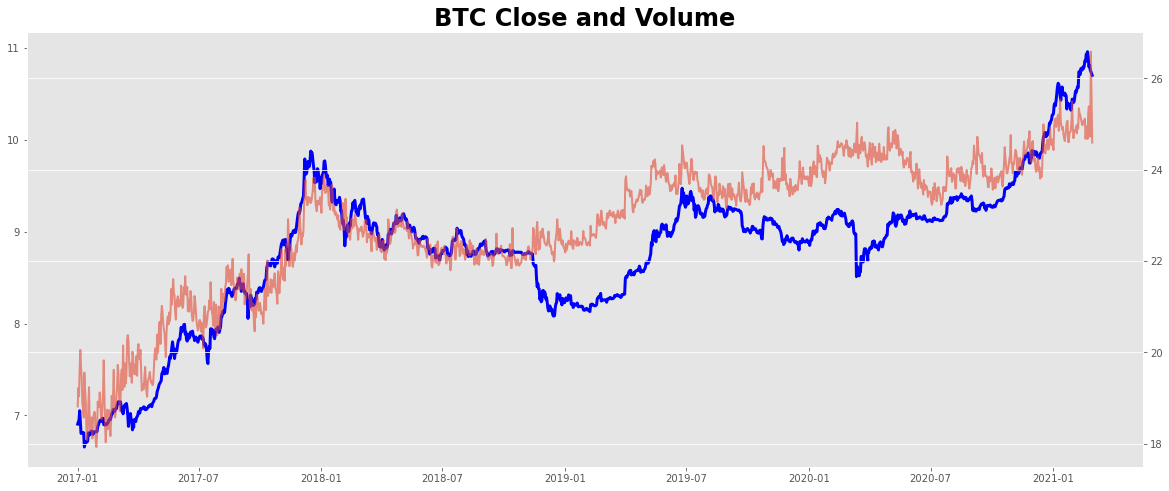

In [36]:
# Comparing both on log scale 

f, ax = plt.subplots(figsize=(20,8))

ax.plot(btc_log['Close'], color = 'blue', lw=3, label = 'BTC Log Price')
ax.grid(False)
ax = ax.twinx()
ax.plot(btc_log['Volume'], alpha=0.6, lw = 2)
# ax.plot(df2['fng_value'].rolling(7).mean(), alpha=0.6, lw =2, label = '7D (weekly) Rolling Average')

ax.set_title('BTC Close and Volume', fontsize=24, fontweight='bold')

plt.show()

In [37]:
btc_log[['Close', 'Volume']].corr()

,Close,Volume
Close,1.000000,0.870358
Volume,0.870358,1.000000


Text(0.5, 1.0, 'Regression Plot BTC Close vs. Volume')

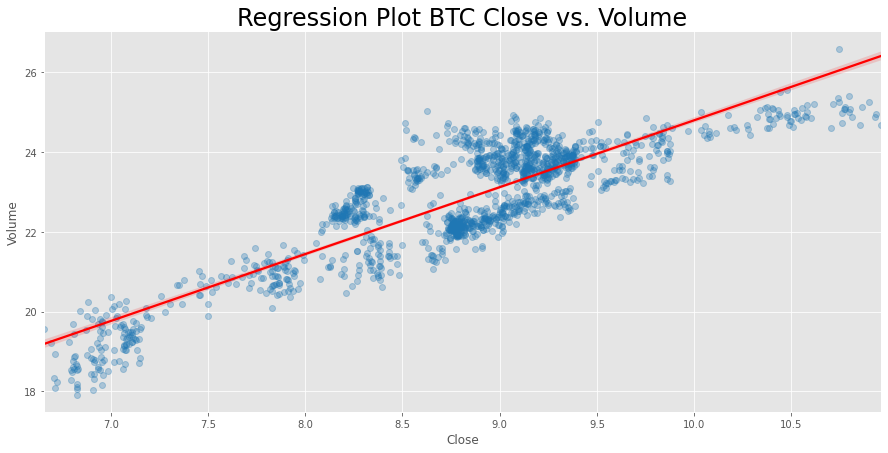

In [39]:
plt.figure(figsize=(15,7))
sns.regplot(x="Close",y="Volume",data=btc_log, color='tab:blue', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Regression Plot BTC Close vs. Volume', fontsize=24)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

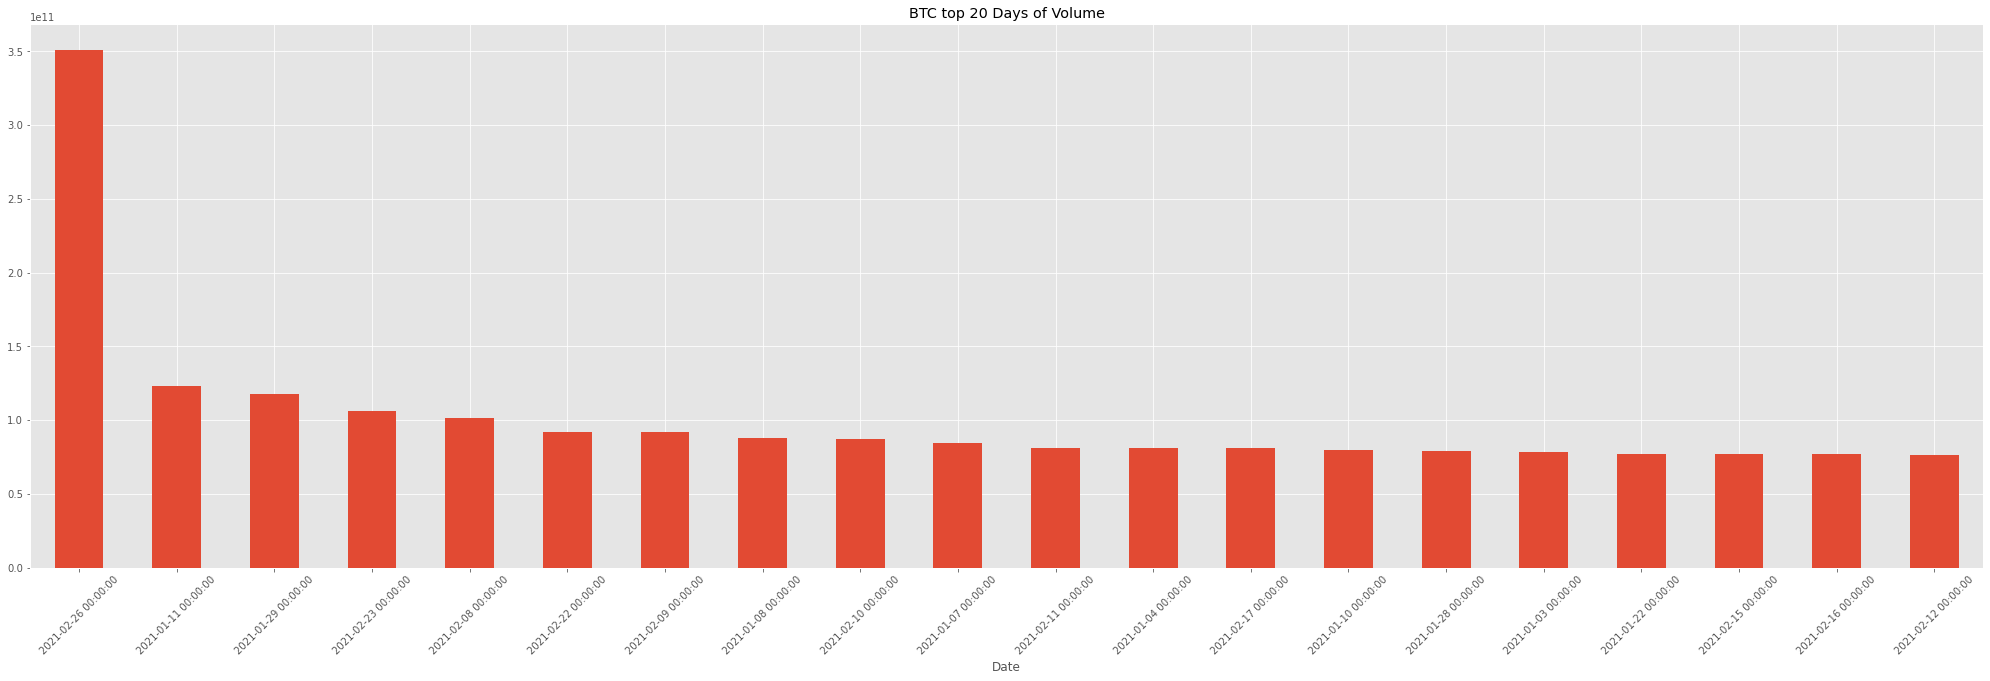

In [63]:
f, ax = plt.subplots(figsize=(35,10))
btc['Volume'].sort_values(ascending=False).head(20).plot(kind='bar')
ax.set_title('BTC top 20 Days of Volume')
plt.xticks(rotation=45)